# Heritability estimate on subtype from LANGUAGE activation maps

##### Subtype:
- Niak preprocessed LANGUAGE task (new scrub method)
- 5 subtype
- **FD_scrubbed_mean regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed_mean" "Age_in_Yrs" "Gender" as covariate


## Build Pheno file

### Merge behavioral variables with subtypes weights

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
%matplotlib inline
%load_ext rpy2.ipython

In [4]:
#custom function for key sorting element
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [5]:
# Set up the paths 
#path_root = '/media/yassine/data_disk/Drive/HCP2/'
path_root = '/home/yassinebha/data/data_disk/Drive/HCP2/'
#path_root = "/home/yassinebha/Drive/HCP/"
subt_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_18-Oct-2017/")
net_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_18-Oct-2017/networks/")
out_path = os.path.join(path_root,"Solar_heritability/HCP_subtype/")

In [6]:
nb_sbt = natural_keys(subt_path)[9]
# task name
task_name = natural_keys(subt_path)[10][5:-1].lower()

In [7]:
task_name

'language'

In [8]:
# Set up files name
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_{}_raw.csv".format(task_name))
solar_script = 'fcd_solar_h2r_test.sh'
pheno_save = 'solar_{}_spm_{}_pheno.csv'.format(task_name.upper(),nb_sbt)
pedig_save = 'solar_{}_spm_pedigre.csv'.format(task_name.upper())
solar_out = 'subtype_{}_{}_{}'.format(nb_sbt,task_name,time.strftime("%d-%m-%Y"))
h2r_out_file = 'h2r_solar_{}_spm_{}.csv'
## Solar covariates
solar_cov = '    cov {}_FD_scrubbed_mean Gender'.format(task_name[:3].upper())

In [9]:
# List of network names
list_trial = os.listdir(net_path)
list_trial

['story']

In [10]:
# Loop over each network and build weight file
for index, trial_name in enumerate(list_trial):
    file_path = os.path.join(net_path, trial_name, sbt_name_pattern.format(trial_name))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}_{}".format(task_name[:3].upper(),trial_name, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [11]:
dataframe.head()

,Subject,LAN_story_sub1,LAN_story_sub2,LAN_story_sub3,LAN_story_sub4,LAN_story_sub5
0,HCP100206,0.049,-0.063,0.084,-0.134,0.040
1,HCP100307,-0.547,0.570,-0.522,-0.197,0.317
2,HCP100408,0.060,-0.038,0.053,-0.003,-0.056
3,HCP100610,-0.323,0.290,-0.301,-0.224,0.314
4,HCP101006,-0.004,-0.032,0.025,-0.042,0.055


In [12]:
dataframe.Subject.describe()

count           778
unique          778
top       HCP391748
freq              1
Name: Subject, dtype: object

In [13]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(pheno_path)

In [14]:
file_pheno.head()

,Unnamed: 0,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100206,0.088456,0.088456,0.099963,0.099963,0.094210,0.094210,HCP100206,27.0,1.0,...,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
1,HCP100307,0.101970,0.101970,0.119331,0.119331,0.110650,0.110650,HCP100307,27.0,2.0,...,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
2,HCP100408,0.128052,0.128052,0.140232,0.140232,0.134142,0.134142,HCP100408,33.0,1.0,...,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
3,HCP100610,0.189474,0.189474,0.179002,0.179002,0.184238,0.184238,HCP100610,27.0,1.0,...,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114
4,HCP101006,0.156877,0.156877,0.131924,0.131924,0.144401,0.144401,HCP101006,35.0,2.0,...,0.608381,0.037740,0.055531,-0.883482,-0.383174,-0.309221,-0.753780,-1.183212,0.031989,-0.494022


In [15]:
file_pheno.Subject.describe()

count           801
unique          801
top       HCP473952
freq              1
Name: Subject, dtype: object

In [16]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Gender","BMI","FD_mean","FD_scrubbed_mean"]]
file_pheno_subset.rename(columns={'FD_mean': '{}_FD_mean'.format(task_name[:3].upper()),
                                  'FD_scrubbed_mean': '{}_FD_scrubbed_mean'.format(task_name[:3].upper())},
                         inplace=True)
file_pheno_subset.head()

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Subject,Age_in_Yrs,Gender,BMI,LAN_FD_mean,LAN_FD_scrubbed_mean
0,HCP100206,27.0,1.0,26.64,0.094210,0.094210
1,HCP100307,27.0,2.0,22.96,0.110650,0.110650
2,HCP100408,33.0,1.0,27.75,0.134142,0.134142
3,HCP100610,27.0,1.0,36.91,0.184238,0.184238
4,HCP101006,35.0,2.0,30.27,0.144401,0.144401


In [17]:
# Replace gender M=1 and F=2
#file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
#file_pheno_subset.head()

In [18]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,801
unique,801
top,HCP473952
freq,1


In [19]:
file_weight[["Subject"]].describe()

,Subject
count,778
unique,778
top,HCP391748
freq,1


In [20]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,LAN_story_sub1,LAN_story_sub2,LAN_story_sub3,LAN_story_sub4,LAN_story_sub5,Age_in_Yrs,Gender,BMI,LAN_FD_mean,LAN_FD_scrubbed_mean
0,HCP100206,0.049,-0.063,0.084,-0.134,0.040,27.0,1.0,26.64,0.094210,0.094210
1,HCP100307,-0.547,0.570,-0.522,-0.197,0.317,27.0,2.0,22.96,0.110650,0.110650
2,HCP100408,0.060,-0.038,0.053,-0.003,-0.056,33.0,1.0,27.75,0.134142,0.134142
3,HCP100610,-0.323,0.290,-0.301,-0.224,0.314,27.0,1.0,36.91,0.184238,0.184238
4,HCP101006,-0.004,-0.032,0.025,-0.042,0.055,35.0,2.0,30.27,0.144401,0.144401


In [21]:
merged_weight_pheno.ID.describe()

count           778
unique          778
top       HCP391748
freq              1
Name: ID, dtype: object

In [22]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

0

In [23]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

In [24]:
os.path.join(out_path,pheno_save)

'/home/yassinebha/data/data_disk/Drive/HCP2/Solar_heritability/HCP_subtype/solar_LANGUAGE_spm_5_pheno.csv'

## Build trait file

In [25]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['LAN_story_sub1',
 'LAN_story_sub2',
 'LAN_story_sub3',
 'LAN_story_sub4',
 'LAN_story_sub5',
 'BMI',
 'LAN_FD_mean',
 'LAN_FD_scrubbed_mean']

In [26]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [27]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037.0,1.0
1,HCP100307,Twin,NotMZ,51488.0,2.0
2,HCP100408,Twin,MZ,51730.0,1.0
3,HCP100610,Twin,NotMZ,52813.0,1.0
4,HCP101006,Twin,MZ,51283.0,2.0


In [28]:
file_pheno_pedig.Subject.describe()

count           801
unique          801
top       HCP473952
freq              1
Name: Subject, dtype: object

In [29]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [30]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.astype(int)
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


tail


,ID,fa,mo,sex,mztwin,hhID
796,HCP992673,fa_56143.0,mo_56143.0,2,,hh_56143.0
797,HCP992774,fa_51345.0,mo_51345.0,1,,hh_51345.0
798,HCP993675,fa_55800.0,mo_55800.0,2,,hh_55800.0
799,HCP994273,fa_52364.0,mo_52364.0,1,,hh_52364.0
800,HCP996782,fa_51541.0,mo_51541.0,2,,hh_51541.0


ID        801
fa        801
mo        801
sex       801
mztwin    801
hhID      801
dtype: int64

In [31]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
#for idx, twin in enumerate(uniques):
    #print("{} occurs {} times".format(twin, twin_counts[idx]))

In [32]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [33]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [34]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,ID,fa,mo,sex,mztwin,hhID
37,M_HCP110007,fa_54572.0,mo_54572.0,2,pair_54572.0,hh_54572.0
55,M_HCP114823,fa_52925.0,mo_52925.0,2,pair_52925.0,hh_52925.0
82,M_HCP122317,fa_51802.0,mo_51802.0,1,pair_51802.0,hh_51802.0
87,M_HCP123824,fa_56022.0,mo_56022.0,1,pair_56022.0,hh_56022.0
90,M_HCP124422,fa_51529.0,mo_51529.0,2,pair_51529.0,hh_51529.0


ID        42
fa        42
mo        42
sex       42
mztwin    42
hhID      42
dtype: int64

In [35]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


In [36]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
694,M_HCP769064,fa_52803.0,mo_52803.0,1,pair_52803.0,hh_52803.0
721,M_HCP835657,fa_52137.0,mo_52137.0,2,pair_52137.0,hh_52137.0
723,M_HCP837964,fa_52875.0,mo_52875.0,2,pair_52875.0,hh_52875.0
764,M_HCP904044,fa_51290.0,mo_51290.0,2,pair_51290.0,hh_51290.0
788,M_HCP972566,fa_56077.0,mo_56077.0,2,pair_56077.0,hh_56077.0


In [37]:
df_pedig_final.count()

ID        843
fa        843
mo        843
sex       843
mztwin    843
hhID      843
dtype: int64

In [38]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

In [39]:
out_path

'/home/yassinebha/data/data_disk/Drive/HCP2/Solar_heritability/HCP_subtype/'

## Run SOLAR heritability estimate 

In [40]:
%%bash -s "$out_path" "$solar_cov" "$solar_script" 
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [41]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.3.2 (General), last updated on October 31, 2016
Copyright (c) 1995-2016 Maryland Psychiatric Research Center
Visit our website www.solar-eclipse-genetics.org
For questions email: pkochunov@gmail.com
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_LANGUAGE_spm_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1573  Self
       117  Identical sib pair
      1686  Parent-offspring
       588  Siblings
       365  Unrelated



In [42]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
#if [ ! -d $3 ]; then
#   mkdir $3
#fi
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r_test.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.3.2 (General), last updated on October 31, 2016
Copyright (c) 1995-2016 Maryland Psychiatric Research Center
Visit our website www.solar-eclipse-genetics.org
For questions email: pkochunov@gmail.com
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00007 : Set-7 : LAN_FD_scrubbed_mean                                                  
All done.


## Results

In [43]:
solar_out

'subtype_5_language_16-08-2018'

In [58]:
solar_out = 'subtype_5_language_23-01-2018'
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()

data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True]).reset_index(drop=True)
out_herit_df.to_csv(os.path.join(out_path,solar_out,'language_h2r_raw.csv'),index=False)
out_herit_df

,Trait,H2r,P,CovVarianceExpl
0,BMI_norm,0.508834,5.349089e-11,0.371345
1,LAN_FD_mean_norm,0.308855,8.680000e-05,0.831375
2,LAN_FD_scrubbed_mean_norm,0.044349,2.599000e-01,0.961540
3,LAN_story_sub1_norm,0.623924,7.212409e-20,0.000387
4,LAN_story_sub2_norm,0.625575,1.519570e-19,0.000113
5,LAN_story_sub3_norm,0.617065,4.149818e-19,0.000041
6,LAN_story_sub4_norm,0.616222,1.233233e-18,0.011030
7,LAN_story_sub5_norm,0.635130,4.557154e-21,0.001847


In [59]:
# remove unwanted Variables
out_herit_df_clean = out_herit_df[~out_herit_df['Trait'].str.strip().isin(['BMI_norm',
                                                                           '{}_FD_mean_norm'.format(task_name[:3].upper()),
                                                                           '{}_FD_scrubbed_mean_norm'.format(task_name[:3].upper())])]

In [60]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(out_herit_df_clean['P'], alpha=0.05, method='fdr_bh')
out_herit_df_clean.insert(3,'FDR',pcorr_vec[1])
out_herit_df_clean.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))

In [61]:
out_herit_df_clean

,Trait,H2r,P,FDR,FDR_log10,CovVarianceExpl
3,LAN_story_sub1_norm,0.623924,7.212409e-20,1.803102e-19,18.743980,0.000387
4,LAN_story_sub2_norm,0.625575,1.519570e-19,2.532616e-19,18.596431,0.000113
5,LAN_story_sub3_norm,0.617065,4.149818e-19,5.187272e-19,18.285061,0.000041
6,LAN_story_sub4_norm,0.616222,1.233233e-18,1.233233e-18,17.908955,0.011030
7,LAN_story_sub5_norm,0.635130,4.557154e-21,2.278577e-20,19.642336,0.001847


In [62]:
out_herit_df_clean.to_csv(os.path.join(out_path,solar_out,'h2r_{}_raw.csv'.format(task_name)),index=False)

In [63]:
# create table for h2r figure
list_sbt = ['sub1','sub2','sub3','sub4','sub5']
df = pd.DataFrame()
for trait_herit in list_trial:
    mask_df = [x[4:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r','P']][mask_df]
    # extract trial
    column_net = [' '.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r','P']]
    out_herit_clean.reset_index(drop=True,inplace=True)
    dicts = {}
    for ii,sbt in enumerate(list_sbt):
        if sbt not in out_herit_clean.Subt.get_values():
            dicts[ii] = sbt
    if bool(dicts):
        tab_=[{"Trial": out_herit_clean.Trial[0], "Subt": dicts[ii],"H2r":0,"P":1} for ii in dicts.keys()]
        line = pd.DataFrame(tab_,index=dicts.keys())
        df_ = out_herit_clean.append(line).sort_values('Subt').reset_index(drop=True)
        df_ = df_[['Trial','Subt','H2r','P']]
    else:
        df_ = out_herit_clean.sort_values('Subt').reset_index(drop=True)
        df_ = df_[['Trial','Subt','H2r','P']]
    # append to final df
    df = df.append(df_)
# reset index
df.reset_index(drop=True)
# save to csv
df.to_csv(os.path.join(out_path,solar_out,'h2r_{}.csv'.format(task_name)),index=False)
df

,Trial,Subt,H2r,P
0,LAN story,sub1,0.623924,7.212409e-20
1,LAN story,sub2,0.625575,1.519570e-19
2,LAN story,sub3,0.617065,4.149818e-19
3,LAN story,sub4,0.616222,1.233233e-18
4,LAN story,sub5,0.635130,4.557154e-21


In [51]:
# Loop over trait and create heritability table for radar plot
#drop_list = ['BMI','FD_mean','FD_scrubbed_mean','Handedness']
#list_new = [x for x in new_list if x not in drop_list ]

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


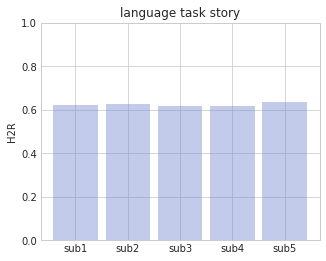

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.623924,0.625575,0.617065,0.616222,0.63513


In [52]:
## Loop over trait and create heritability table for radar plot
#list_trial = [xx.replace('-','_') for xx in list_trial]
list_sbt = ['sub1','sub2','sub3','sub4','sub5']
for trait_herit in list_trial:
    mask_df = [x[4:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r']][mask_df]
    # extract trial
    column_net = [' '.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r']]
    # Pivot table
    out_herit_final = out_herit_clean.pivot(index='Trial',columns='Subt',values='H2r')
    out_herit_final.index.name=None
    out_herit_final.rename(index={column_net[1]: 'H2R'},inplace= True)
    #put 0 for non for empty heritabity
    for ii in list_sbt:
        if ii not in out_herit_final.columns.get_values():
            out_herit_final.loc[:,ii]=0
    out_herit_final=out_herit_final[list_sbt]
    out_herit_final.to_csv(os.path.join(out_path,solar_out,h2r_out_file.format(task_name,trait_herit)))
    # H2R bar plot
    fig,ax = plt.subplots(figsize=(5, 4))
    y_pos = np.arange(len(out_herit_final.columns))
    ax.bar(y_pos,out_herit_final.ix['H2R'],color="#6a7fce",alpha=0.4,align = 'center',width=0.85)
    ax.set_xticks(y_pos)
    ax.set_xticklabels(list_sbt)
    ax.set_ylim(0,1)
    ax.set_ylabel('H2R')
    #ax.grid(False)
    plt.title('{} task {}'.format(task_name,trait_herit))
    plt.show()
    fig.savefig(os.path.join(subt_path,"{}_barplot_heritability.svg".format(trait_herit)))
    display(out_herit_final)

In [53]:
##### R section #########

In [54]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
# devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)
import warnings
warnings.filterwarnings('ignore')

In [55]:
%%R
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

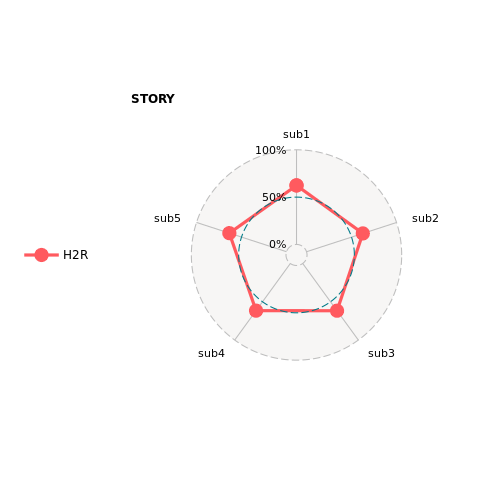

In [56]:
%%R -i out_path,solar_out,task_name,list_trial,path_root
for (ii in list_trial) {
    MyData <- read.csv(file=paste(out_path,solar_out,"/h2r_solar_",task_name,'_spm_',ii,'.csv',sep = ''))
    # plot radar 
    image=ggradar(MyData, grid.min = 0,
                  grid.mid = 0.5, 
                  grid.max = 1, 
                  axis.label.size = 4, 
                  grid.label.size = 5 ,
                  legend.text.size =5) +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' \n  ',toupper(ii),sep = ''))
    ggsave(file=paste(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_18-Oct-2017/" ,ii,"_heritability.svg",sep = ''), plot=image, width=10, height=8)
    print(image)
     }